In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [61]:
data = pd.read_csv("/content/Demo_dataset.csv")

In [62]:
scaler = MinMaxScaler()

column=['Num_question','Num_equation','Num_diagram','Report','Coding','Days_left']
data[column] = scaler.fit_transform(data[column])
# data = pd.DataFrame(scaler.fit_transform(data), c/olumns=data.columns)
data

,Num_question,Num_equation,Num_diagram,Report,Coding,Days_left,Predicted_time
0,0.555556,0.50,1.0,1.0,0.0,0.066667,363
1,0.888889,0.25,0.0,0.0,0.0,0.133333,339
2,0.777778,0.75,1.0,1.0,1.0,0.400000,456
3,0.222222,0.25,1.0,0.0,0.0,0.400000,164
4,0.333333,0.00,0.0,0.0,0.0,0.866667,216
...,...,...,...,...,...,...,...
495,0.777778,0.00,0.5,1.0,0.0,0.333333,281
496,0.222222,0.00,1.0,1.0,0.0,0.666667,220
497,1.000000,0.50,0.5,1.0,1.0,0.133333,420
498,0.222222,1.00,1.0,0.0,1.0,0.800000,317


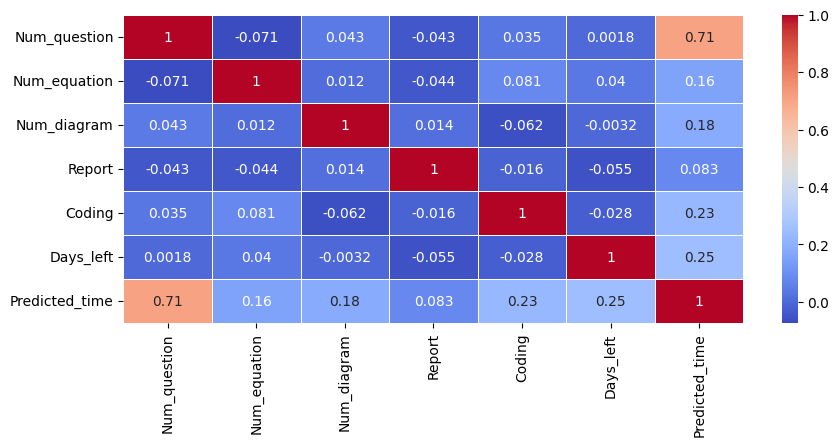

In [63]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

X=data.drop(columns=['Predicted_time']).values
y=data['Predicted_time'].values.reshape((len(data),1))
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=54)
print(X_train.shape)
print(X_test.shape)

(350, 6)
(150, 6)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



Mean Absolute Error: 46.90284054107829
Mean Squared Error: 3520.4055901554366
R² Score: 0.6579908815567455


In [68]:
import joblib

joblib.dump(model1, 'linear_model.pkl')

['linear_model.pkl']

In [52]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [53]:
X_train_tensor = torch.from_numpy(X_train).float()  # Ensure dtype is float32
y_train_tensor = torch.from_numpy(y_train).float()

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()

        # Define the layers
        self.hidden = nn.Linear(input_size, hidden_size)   # Hidden layer
        self.output = nn.Linear(hidden_size, output_size)  # Output layer (linear activation)

    def forward(self, x):
        # Forward pass: input -> hidden layer with ReLU -> output layer (no activation)
        x = torch.relu(self.hidden(x))      # Hidden layer with ReLU activation
        x = self.output(x)                  # Linear output layer
        return x

# Initialize the model, loss function, and optimizer
input_size = 6           # Number of input features
hidden_size = 64         # Number of neurons in the hidden layer
output_size = 1          # Output size (1 for a single continuous target variable)

model = SimpleNN(input_size, hidden_size, output_size)

# Mean Squared Error loss for regression
criterion = nn.MSELoss()

# Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [55]:
# Example data
# X_train and y_train should be PyTorch tensors
# X_train shape: (num_samples, 6), y_train shape: (num_samples, 1)

# Training parameters


epochs = 500
batch_size = 32
num_batches = len(X_train_tensor) // batch_size

# Training loop
for epoch in range(epochs):
    for i in range(num_batches):
        # Get a batch of training data
        start = i * batch_size
        end = start + batch_size
        inputs = X_train_tensor[start:end]
        targets = y_train_tensor[start:end]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Print loss for every epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1/500], Loss: 91611.3281
Epoch [2/500], Loss: 88566.0469
Epoch [3/500], Loss: 82732.5469
Epoch [4/500], Loss: 73530.0703
Epoch [5/500], Loss: 61128.8320
Epoch [6/500], Loss: 46603.4609
Epoch [7/500], Loss: 31920.7969
Epoch [8/500], Loss: 19523.4707
Epoch [9/500], Loss: 11384.8438
Epoch [10/500], Loss: 8088.5552
Epoch [11/500], Loss: 8031.0557
Epoch [12/500], Loss: 8575.7061
Epoch [13/500], Loss: 8498.6768
Epoch [14/500], Loss: 8109.4336
Epoch [15/500], Loss: 7782.8042
Epoch [16/500], Loss: 7578.5039
Epoch [17/500], Loss: 7449.1489
Epoch [18/500], Loss: 7346.8052
Epoch [19/500], Loss: 7241.1748
Epoch [20/500], Loss: 7122.4312
Epoch [21/500], Loss: 6996.0059
Epoch [22/500], Loss: 6870.5176
Epoch [23/500], Loss: 6750.3340
Epoch [24/500], Loss: 6638.1030
Epoch [25/500], Loss: 6530.7759
Epoch [26/500], Loss: 6431.1875
Epoch [27/500], Loss: 6335.6519
Epoch [28/500], Loss: 6242.1431
Epoch [29/500], Loss: 6151.0527
Epoch [30/500], Loss: 6065.2480
Epoch [31/500], Loss: 5984.5806
Epoch [3

In [56]:
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [57]:
from sklearn.metrics import r2_score ,mean_absolute_error
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    predictions = model(X_test_tensor)  # Forward pass with test data
    # test_loss = criterion(predictions, y_test_tensor)  # Calculate test loss
    r2 = r2_score(y_test_tensor.numpy(), predictions.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), predictions.numpy())

print(r2)
print(mae)
# Print the test loss
# print(f"Test Loss: {test_loss.item():.4f}")

0.6502630710601807
46.473743


In [59]:
torch.save(model.state_dict(), 'model.pth')